In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.interpolate as inter
%matplotlib inline

In [3]:
Fs =50
Ts =1/ Fs # sampling frequency Fs in Hz and period Ts in sec
t =np.arange(0,1,Ts) # discrete - time axis , from 0 to 1 second

Text(0, 0.5, 'Impulse area')

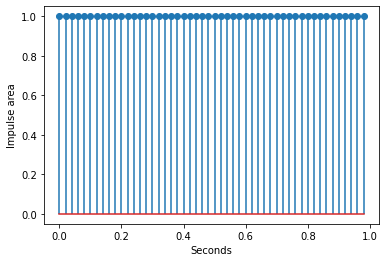

In [4]:
plt.figure()
plt.stem(t, np.ones(t.shape))
plt.xlabel("Seconds")
plt.ylabel("Impulse area")

Text(0.5, 0, 'Time (s)')

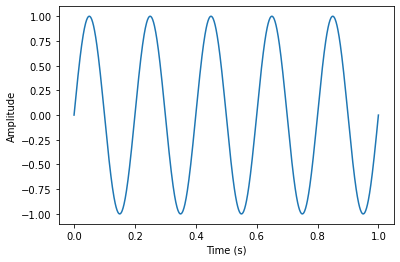

In [5]:
# Defining the signal
f = 5
t = np.linspace(0,1,1000)
y = np.sin(2*np.pi*t*f)
plt.figure()
plt.plot(t, y)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Sample (n)')

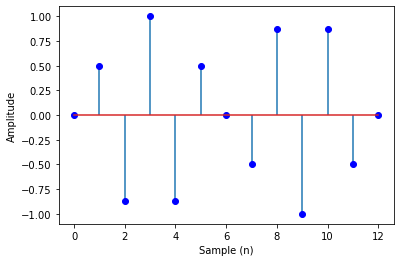

In [6]:
# Sampled signal
f = 5
Fs =12
Ts =1/ Fs # sampling frequency Fs in Hz and period Ts in sec
t =np.arange(0,1+Ts,Ts) # discrete - time axis , from 0 to 1 second
y = np.sin(2*np.pi*t*f)
plt.figure()
#plt.plot(t, y, 'b')
plt.stem(t*Fs,y, markerfmt='bo')
plt.ylabel("Amplitude")
plt.xlabel("Sample (n)")
# plt.xlabel("Time (s)")

Text(0.5, 0, 'Sample (n)')

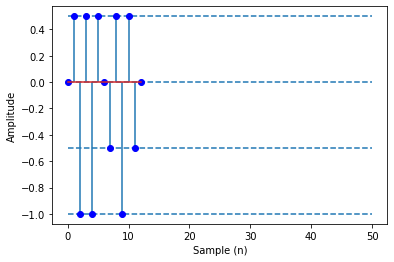

In [7]:
# Quantization
quant_array = np.array([-1, -0.5, 0, 0.5])
def findClosest(x,rounds):
    return rounds[np.argmin(np.absolute(rounds-x))]
quantized_values = [findClosest(x,quant_array) for x in y]

plt.figure()
plt.stem(t*Fs, quantized_values, markerfmt='bo')
plt.hlines(quant_array, 0,50, linestyles="dashed")
plt.ylabel("Amplitude")
plt.xlabel("Sample (n)")

Text(0.5, 0, 'Time (s)')

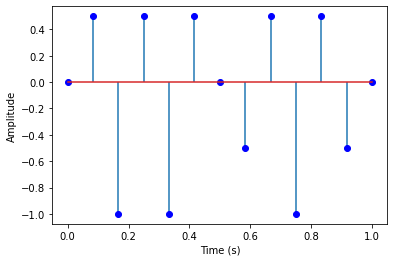

In [8]:
plt.figure()
plt.stem(t, quantized_values, markerfmt='bo')
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

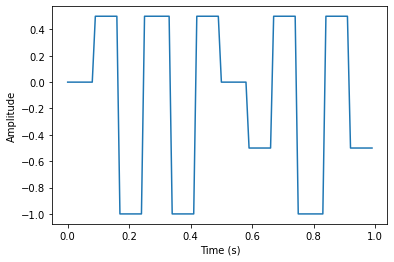

In [9]:
#ZOH
f = inter.interp1d(t, quantized_values, kind="previous")
xnew = np.arange(0, 1, 0.01)
inter_sig = f(xnew)
plt.figure()
plt.plot(xnew, inter_sig)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")

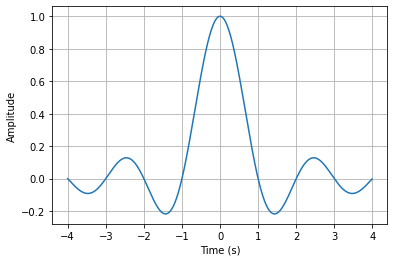

In [10]:
# Sinc
x = np.arange(-4, 4, 0.01)
sinc = np.sinc(x)
plt.figure()
plt.plot(x, sinc)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.grid()

Text(0.5, 0, 'Sample (n)')

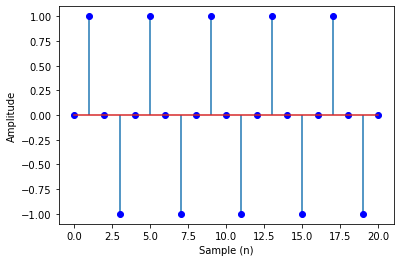

In [28]:
# x[n]
# Sampled signal
f = 5
Fs =20
Ts =1/ Fs # sampling frequency Fs in Hz and period Ts in sec
t =np.arange(0,1+Ts,Ts) # discrete - time axis , from 0 to 1 second
y = np.sin(2*np.pi*t*f)
plt.figure()
#plt.plot(t, y, 'b')
plt.stem(t*Fs,y, markerfmt='bo')
plt.ylabel("Amplitude")
plt.xlabel("Sample (n)")
# plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

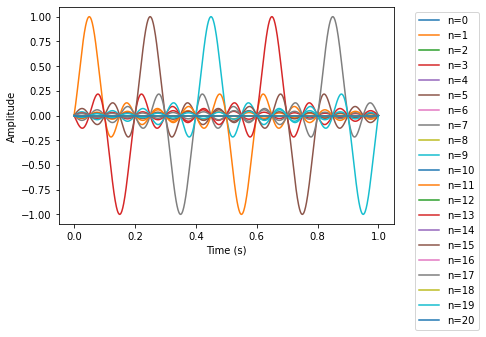

In [29]:
# Reconstruct the signal
t = np.linspace(0,1, 1000)
signal_rec = np.zeros(t.shape[0]) 
plt.figure()
for x, value in enumerate(y):
    func = y[x]*np.sinc( (t - x*Ts) / Ts )
    # print(func.shape)
    signal_rec = signal_rec + func
    plt.plot(t, func, label='n={}'.format(x))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

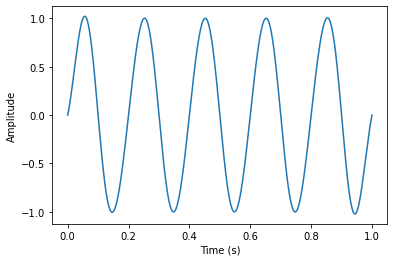

In [30]:
plt.figure()
plt.plot(t, signal_rec)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")